<a href="https://colab.research.google.com/github/faisal-rasheed-lone/Machine_Learning/blob/main/Binary_classification_model_for_non_linear_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# A basic model which performs binary classification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [22]:
X, y = make_circles(n_samples= 1000, noise=0.03, random_state=42)

In [23]:
circles = pd.DataFrame({'x0': X[:,0],
                        'x1': X[:,1],
                        'label':y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


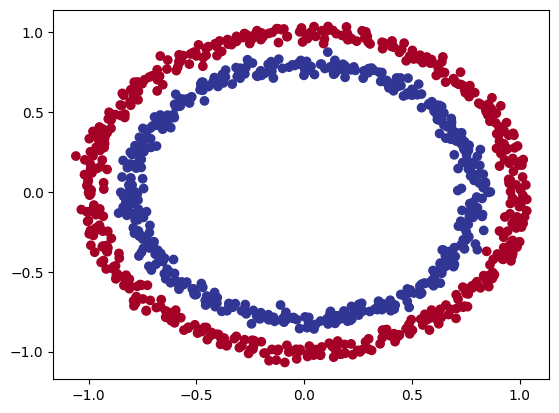

In [24]:
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [25]:
X_train, y_train = X[:800],y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [31]:
# Creating the model to fit the training data
import tensorflow as tf
# setting the random seed
tf.random.set_seed(40)

# building the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compiling the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics='accuracy')

# fitting the model
history=model_1.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 2s 2ms/step - loss: 0.6851 - accuracy: 0.5100
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6419 - accuracy: 0.6538
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5229 - accuracy: 0.8050
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2896 - accuracy: 0.9538
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1323 - accuracy: 0.9850
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0609 - accuracy: 0.9987
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0457 - accuracy: 0.9987
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9950
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9850
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0275 - accuracy: 0.9950
Epoch 11/20
25/25 [

In [32]:
# Evaluating the model
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0616 - accuracy: 0.9800


[0.061559587717056274, 0.9800000190734863]

In [43]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


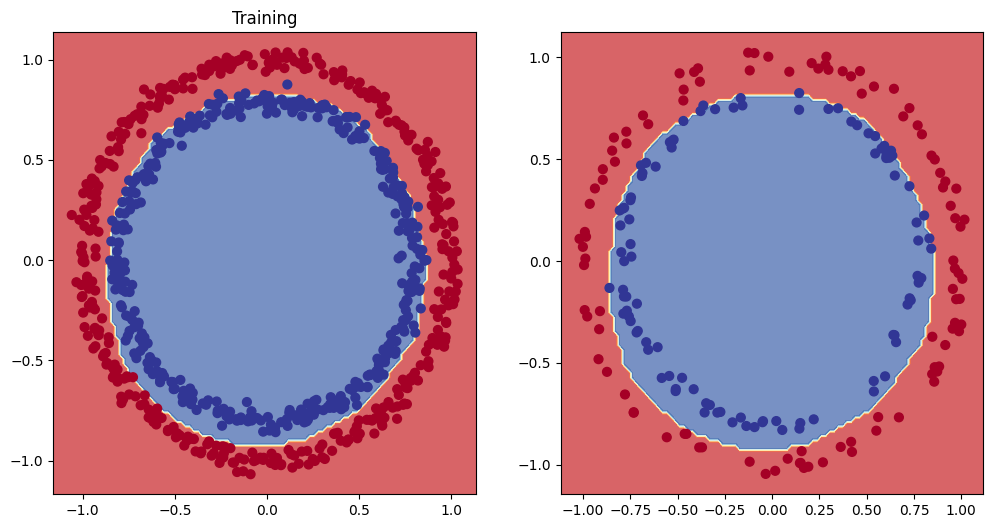

In [44]:
# plotting the decision boundary


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Training')
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model_1, X=X_test, y=y_test)
plt.show()

Text(0.5, 1.0, 'model_1 loss curves')

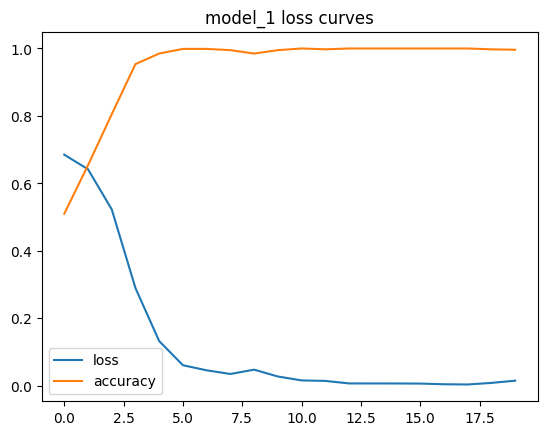

In [48]:
# plotting the loss curves

pd.DataFrame(history.history).plot()
plt.title("model_1 loss curves")